In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## RANGO

In [4]:
maximos = penguins_df.max(numeric_only=True)
maximos

,0
bill_length_mm,59.6
bill_depth_mm,21.5
flipper_length_mm,231.0
body_mass_g,6300.0


In [5]:
minimos = penguins_df.min(numeric_only=True)
minimos

,0
bill_length_mm,32.1
bill_depth_mm,13.1
flipper_length_mm,172.0
body_mass_g,2700.0


In [7]:
rangos = maximos - minimos
rangos

,0
bill_length_mm,27.5
bill_depth_mm,8.4
flipper_length_mm,59.0
body_mass_g,3600.0


## DESVIACIÓN STANDARD ( STD)

In [12]:
stds = penguins_df.std(numeric_only=True)
stds

,0
bill_length_mm,5.459584
bill_depth_mm,1.974793
flipper_length_mm,14.061714
body_mass_g,801.954536


## RANGO INTERCUARTILICO

In [9]:
promedios = penguins_df.mean(numeric_only=True)
promedios

,0
bill_length_mm,43.921930
bill_depth_mm,17.151170
flipper_length_mm,200.915205
body_mass_g,4201.754386


In [13]:
q1  = promedios - stds
q1

,0
bill_length_mm,38.462346
bill_depth_mm,15.176376
flipper_length_mm,186.853491
body_mass_g,3399.799850


In [15]:
q3 = promedios + stds
q3

,0
bill_length_mm,49.381514
bill_depth_mm,19.125963
flipper_length_mm,214.976918
body_mass_g,5003.708922


In [16]:
q1 = penguins_df.quantile(0.25,numeric_only=True)
q3 = penguins_df.quantile(0.75,numeric_only=True)
print(q1)
print(q3)

bill_length_mm         39.225
bill_depth_mm          15.600
flipper_length_mm     190.000
body_mass_g          3550.000
Name: 0.25, dtype: float64
bill_length_mm         48.5
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4750.0
Name: 0.75, dtype: float64


In [20]:
(
    penguins_df
    .quantile(q=[0.25,0.50,0.75],numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.225,44.45,48.5,9.275
1,bill_depth_mm,15.600,17.30,18.7,3.100
2,flipper_length_mm,190.000,197.00,213.0,23.000
3,body_mass_g,3550.000,4050.00,4750.0,1200.000


GRAFICAMOS MEDIDAS DE DISERPSION

In [30]:
penguins_df.bill_depth_mm.std()
penguins_df.bill_depth_mm.quantile(0.50)

17.3

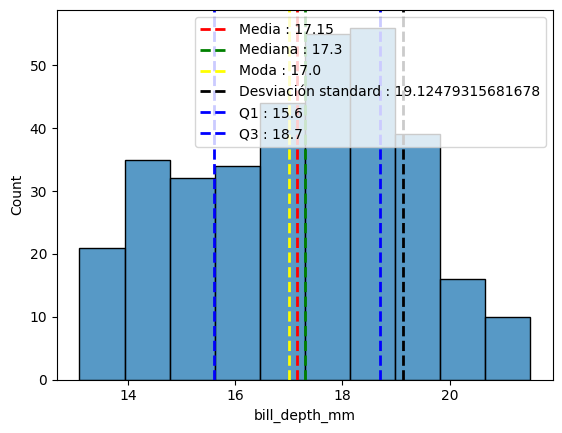

In [32]:
sns.histplot(
    data=penguins_df,
    x='bill_depth_mm'
)

bill_depth_mean = round(penguins_df.bill_depth_mm.mean(),2)
bill_depth_median = penguins_df.bill_depth_mm.median()
bill_depth_mode = penguins_df.bill_depth_mm.mode()[0]
bill_depth_std = bill_depth_mean + penguins_df.bill_depth_mm.std()
bill_depth_q1 = penguins_df.bill_depth_mm.quantile(0.25)
bill_depth_q3 = penguins_df.bill_depth_mm.quantile(0.75)

#GRAFICAMOS LA MEDIA
plt.axvline(
    x=bill_depth_mean,
    color='red',
    linestyle='dashed',
    label=f'Media : {bill_depth_mean}',
    linewidth=2
)
plt.axvline(
    x=bill_depth_median,
    color='green',
    linestyle='dashed',
    label=f'Mediana : {bill_depth_median}',
    linewidth=2
)
plt.axvline(
    x=bill_depth_mode,
    color='yellow',
    linestyle='dashed',
    label=f'Moda : {bill_depth_mode}',
    linewidth=2
)
#std
plt.axvline(
    x=bill_depth_std,
    color='black',
    linestyle='dashed',
    label=f'Desviación standard : {bill_depth_std}',
    linewidth=2
)
#q1
plt.axvline(
    x=bill_depth_q1,
    color='blue',
    linestyle='dashed',
    label=f'Q1 : {bill_depth_q1}',
    linewidth=2
)
#q3
plt.axvline(
    x=bill_depth_q3,
    color='blue',
    linestyle='dashed',
    label=f'Q3 : {bill_depth_q3}',
    linewidth=2
)

plt.legend()
plt.show()

## GRAFICO BOXPLOT

<Axes: xlabel='bill_depth_mm'>

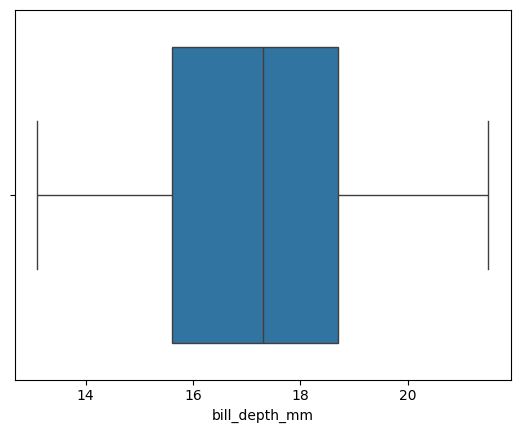

In [33]:
sns.boxplot(x=penguins_df.bill_depth_mm)